## Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

## Import dataset

In [2]:
df_backup = pd.read_csv('dataset.csv')
df_backup.head()

,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,...,VAR_69,VAR_70,VAR_71,VAR_72,VAR_73,VAR_74,VAR_75,VAR_76,VAR_77,VAR_78
0,1,201404,0,0.0,0.0,0.0,0.0,124.54,3277.0,51.98,...,156.38,7.52,0.0,151.0,0.0,3.0,477.84,173.06,0.00,3.0
1,2,201407,0,64.0,0.0,2.0,1.0,47.92,2443.0,84.72,...,707.84,NaN,NaN,187.0,NaN,NaN,NaN,184.69,54.00,NaN
2,3,201405,0,99.0,2.0,2.0,2.0,80.38,1824.0,26.63,...,471.86,NaN,NaN,96.0,NaN,NaN,NaN,732.00,121.98,NaN
3,4,201412,0,0.0,0.0,0.0,0.0,10.58,3796.0,NaN,...,119.96,23.00,0.0,417.0,0.0,0.0,NaN,NaN,0.00,0.0
4,5,201403,1,0.0,0.0,0.0,0.0,70.46,437.0,40.69,...,NaN,NaN,0.0,75.0,0.0,0.0,914.45,NaN,NaN,0.0


In [3]:
df = df_backup.copy()
df.head(1)

,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,...,VAR_69,VAR_70,VAR_71,VAR_72,VAR_73,VAR_74,VAR_75,VAR_76,VAR_77,VAR_78
0,1,201404,0,0.0,0.0,0.0,0.0,124.54,3277.0,51.98,...,156.38,7.52,0.0,151.0,0.0,3.0,477.84,173.06,0.0,3.0


## Preprocessing

In [4]:
pd.set_option('display.max_rows', None)

### 1. Transform features 

#### 1.1 Adjust target feature

In [5]:
# y feature: 0: good and 1: bad
# target feature: 0: bad and 1: good
df['target'] = np.where(df['y'] == 0, 1, 0) 
df['target'].value_counts(normalize=True)

target
1    0.708698
0    0.291302
Name: proportion, dtype: float64

#### 1.2 Adjust feature safra to date time and calculate the time that has passed until a reference date (2017-12-01)

In [6]:
df['safra_dt'] = pd.to_datetime(df['safra'], format = '%Y%m')
df['months_since_cr_line'] = round(pd.to_numeric(((pd.to_datetime('2017-12-01') - df['safra_dt'])/np.timedelta64(1,'D'))/30))
df.head(3)

,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,...,VAR_72,VAR_73,VAR_74,VAR_75,VAR_76,VAR_77,VAR_78,target,safra_dt,months_since_cr_line
0,1,201404,0,0.0,0.0,0.0,0.0,124.54,3277.0,51.98,...,151.0,0.0,3.0,477.84,173.06,0.00,3.0,1,2014-04-01,45.0
1,2,201407,0,64.0,0.0,2.0,1.0,47.92,2443.0,84.72,...,187.0,NaN,NaN,NaN,184.69,54.00,NaN,1,2014-07-01,42.0
2,3,201405,0,99.0,2.0,2.0,2.0,80.38,1824.0,26.63,...,96.0,NaN,NaN,NaN,732.00,121.98,NaN,1,2014-05-01,44.0


<Axes: xlabel='months_since_cr_line', ylabel='Density'>

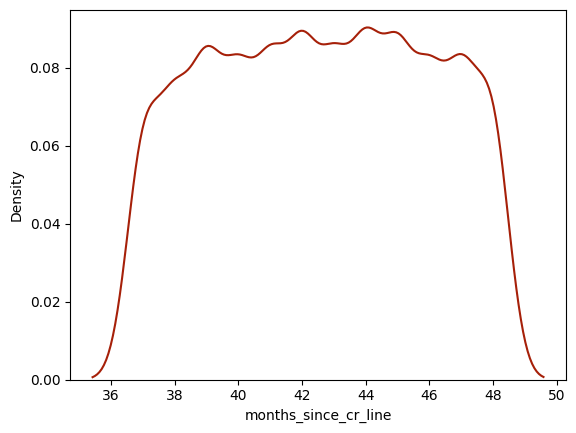

In [7]:
sns.kdeplot(x=df['months_since_cr_line'],color='#a62009')

In [8]:
df['months_since_cr_line'].describe()

count    10738.000000
mean        42.576457
std          3.376001
min         37.000000
25%         40.000000
50%         43.000000
75%         45.000000
max         48.000000
Name: months_since_cr_line, dtype: float64

### 2. Missing values

**Note from Exploratory analysis:**

Filtering the features with missing values, we have that 75% of the features have more than 37.81% of missing values.

As we don't know the meaning of each feature, we are going to set the following rule:

- For features with 50% or less missing values, we will assign them to a "Missing" category during the Fine and Coarse Classing process
- For features with more than 50% missing values, we are going to drop them

#### 2.1 Drop features with more than 50% of missing values

In [9]:
to_drop = []
for col in df.columns:
    if ((df[col].isnull().sum() / df.shape[0]) > 0.5):
        to_drop.append(col)

to_drop = list(set(to_drop))
df_clean = df.drop(columns=to_drop)

In [10]:
df_clean.shape

(10738, 46)

In [11]:
to_drop

['VAR_46',
 'VAR_62',
 'VAR_21',
 'VAR_18',
 'VAR_31',
 'VAR_37',
 'VAR_55',
 'VAR_61',
 'VAR_14',
 'VAR_69',
 'VAR_75',
 'VAR_27',
 'VAR_10',
 'VAR_41',
 'VAR_47',
 'VAR_16',
 'VAR_77',
 'VAR_12',
 'VAR_51',
 'VAR_50',
 'VAR_66',
 'VAR_70',
 'VAR_74',
 'VAR_48',
 'VAR_73',
 'VAR_26',
 'VAR_43',
 'VAR_71',
 'VAR_78',
 'VAR_42',
 'VAR_63',
 'VAR_49',
 'VAR_23',
 'VAR_56',
 'VAR_67',
 'VAR_68',
 'VAR_36',
 'VAR_29']

In [12]:
len(to_drop)

38

In [13]:
df_clean.isnull().sum()/df_clean.shape[0]

id                      0.000000
safra                   0.000000
y                       0.000000
VAR_1                   0.038741
VAR_2                   0.038741
VAR_3                   0.038741
VAR_4                   0.038741
VAR_5                   0.378096
VAR_6                   0.008475
VAR_7                   0.431365
VAR_8                   0.450084
VAR_9                   0.000000
VAR_11                  0.464146
VAR_13                  0.485938
VAR_15                  0.470665
VAR_17                  0.419166
VAR_19                  0.005681
VAR_20                  0.000000
VAR_22                  0.005681
VAR_24                  0.378096
VAR_25                  0.005681
VAR_28                  0.005681
VAR_30                  0.004470
VAR_32                  0.000000
VAR_33                  0.005681
VAR_34                  0.450084
VAR_35                  0.464146
VAR_38                  0.431365
VAR_39                  0.485938
VAR_40                  0.005681
VAR_44    

In [14]:
df_clean.head()

,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,...,VAR_58,VAR_59,VAR_60,VAR_64,VAR_65,VAR_72,VAR_76,target,safra_dt,months_since_cr_line
0,1,201404,0,0.0,0.0,0.0,0.0,124.54,3277.0,51.98,...,369.0,95.54,-0.030478,0,1303.79,151.0,173.06,1,2014-04-01,45.0
1,2,201407,0,64.0,0.0,2.0,1.0,47.92,2443.0,84.72,...,228.0,97.73,0.357324,0,1486.26,187.0,184.69,1,2014-07-01,42.0
2,3,201405,0,99.0,2.0,2.0,2.0,80.38,1824.0,26.63,...,264.0,294.57,-0.411787,0,800.27,96.0,732.00,1,2014-05-01,44.0
3,4,201412,0,0.0,0.0,0.0,0.0,10.58,3796.0,NaN,...,49.0,NaN,0.721630,0,NaN,417.0,NaN,1,2014-12-01,37.0
4,5,201403,1,0.0,0.0,0.0,0.0,70.46,437.0,40.69,...,332.0,NaN,-0.231735,1,1457.78,75.0,NaN,0,2014-03-01,46.0


In [15]:
df_clean.to_csv('base_modelo_preprocessed.csv')